In [ ]:
#PROBLREM: PART OF MY RESEARCH IS TO MODEL AND OPTIMISE AN ADVANCED MANUFACTURING PROCESS CALLED CO2 LASER CUTTING.
#THIS PROCESS WAS USED TO CUT 29 SIMILAR GEAR USING USING 4 INPUTS:LASER POWER, CUTTING SPEED, FOCAL POSITION AND 
#GAS PRESSURE. THE OUTPUTS WERE SURFACE ROUGHNESS(RZ AND RA), MATERIAL REMOVAL RATE (MRR) AND DIMENSIONAL DEVIATIONS(DD)
#SVR WAS USED BECAUSE OUR DATA WAS NOT CORRELATING - IT WAS ALL OVER THE PLACE.
#THIS MODEL PREDICTS RA USING THE 4 INPUTS

In [19]:
import pandas as pd
import numpy as np

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
df =pd.read_excel('Laser.xlsx')
df.head()

,Std,Run,Laser power [W],Cutting speed [m/min],Focal position [mm],Gas pressure [bar],Rz [µm],Ra [µm],MRR,DD [%]
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[mm3/min],NaN
1,1.0,11.0,1500.0,1.0,-2.5,13.0,3.69,0.74,2020.3,1.0264
2,2.0,24.0,2500.0,1.0,-2.5,13.0,2.21,0.43,2367.81,1.0268
3,3.0,28.0,1500.0,3.0,-2.5,13.0,2.36,0.47,5353.33,1.5244
4,4.0,6.0,2500.0,3.0,-2.5,13.0,3.40,0.76,6189.06,0.9088


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Std                    29 non-null     float64
 1   Run                    29 non-null     float64
 2   Laser power [W]        29 non-null     float64
 3   Cutting speed [m/min]  29 non-null     float64
 4   Focal position [mm]    29 non-null     float64
 5   Gas pressure [bar]     29 non-null     float64
 6   Rz [µm]                29 non-null     float64
 7   Ra [µm]                29 non-null     float64
 8   MRR                    30 non-null     object 
 9   DD [%]                 29 non-null     float64
dtypes: float64(9), object(1)
memory usage: 2.5+ KB


In [43]:
df.dropna(inplace=True)
df.head()

,Std,Run,Laser power [W],Cutting speed [m/min],Focal position [mm],Gas pressure [bar],Rz [µm],Ra [µm],MRR,DD [%]
1,1.0,11.0,1500.0,1.0,-2.5,13.0,3.69,0.74,2020.3,1.0264
2,2.0,24.0,2500.0,1.0,-2.5,13.0,2.21,0.43,2367.81,1.0268
3,3.0,28.0,1500.0,3.0,-2.5,13.0,2.36,0.47,5353.33,1.5244
4,4.0,6.0,2500.0,3.0,-2.5,13.0,3.40,0.76,6189.06,0.9088
5,5.0,14.0,2000.0,2.0,-3.5,10.0,4.74,0.93,4539.1,1.6582


In [10]:
df.describe()

,Std,Run,Laser power [W],Cutting speed [m/min],Focal position [mm],Gas pressure [bar],Rz [µm],Ra [µm],DD [%]
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,15.000000,15.000000,2000.000000,2.000000,-2.500000,13.000000,3.394828,0.688966,1.180128
std,8.514693,8.514693,327.326835,0.654654,0.654654,1.963961,0.828793,0.171034,0.262994
min,1.000000,1.000000,1500.000000,1.000000,-3.500000,10.000000,2.210000,0.430000,0.735100
25%,8.000000,8.000000,2000.000000,2.000000,-2.500000,13.000000,2.790000,0.570000,0.994500
50%,15.000000,15.000000,2000.000000,2.000000,-2.500000,13.000000,3.210000,0.660000,1.058200
75%,22.000000,22.000000,2000.000000,2.000000,-2.500000,13.000000,3.890000,0.820000,1.344500
max,29.000000,29.000000,2500.000000,3.000000,-1.500000,16.000000,4.980000,1.030000,1.914200


In [11]:
X = df[['Laser power [W]', 'Cutting speed [m/min]', 'Focal position [mm]', 'Gas pressure [bar]']]
y= df[ 'Ra [µm]']

C:\Users\stukg\AppData\Local\Temp\ipykernel_134004\3959719262.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ra [µm]'])


<Axes: xlabel='Ra [µm]', ylabel='Density'>

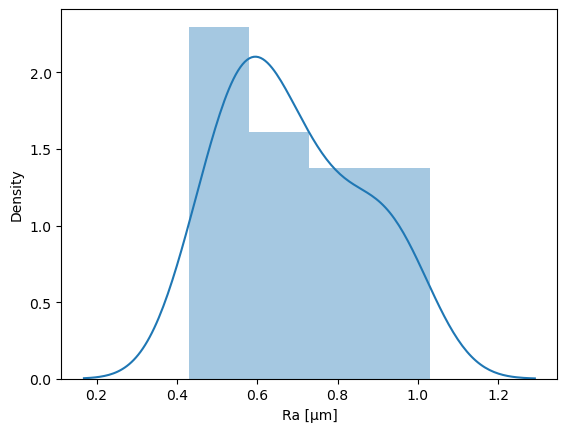

In [44]:
sns.distplot(df['Ra [µm]'])

# SCALING THE INPUTS

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler=MinMaxScaler()

In [46]:
X=scaler.fit_transform(X)

# SPLITTING THE DATA AND RUNNING THE MODEL

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.svm import SVR

In [47]:
mdl = SVR()

In [48]:
mdl.fit(X_train, y_train)

SVR()

In [49]:
pred = mdl.predict(X_test)

# USING GRID SEARCH TO FIND OPTMAL HYPERPARAMETER

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
param_grid = {'C':[0.01,0.1,1,10,100,1000],'gamma':[10,1,0.1,0.001,0.0001,0.00001],'epsilon':[0.001,0.001,0.01,0.1,1,10]}

In [52]:
grid = GridSearchCV(SVR(),param_grid,verbose =3)

In [53]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5] END ..C=0.01, epsilon=0.001, gamma=10;, score=-0.722 total time=   0.0s
[CV 2/5] END ..C=0.01, epsilon=0.001, gamma=10;, score=-0.733 total time=   0.0s
[CV 3/5] END ..C=0.01, epsilon=0.001, gamma=10;, score=-0.066 total time=   0.0s
[CV 4/5] END ..C=0.01, epsilon=0.001, gamma=10;, score=-0.101 total time=   0.0s
[CV 5/5] END ..C=0.01, epsilon=0.001, gamma=10;, score=-0.021 total time=   0.0s
[CV 1/5] END ...C=0.01, epsilon=0.001, gamma=1;, score=-0.648 total time=   0.0s
[CV 2/5] END ...C=0.01, epsilon=0.001, gamma=1;, score=-0.752 total time=   0.0s
[CV 3/5] END ...C=0.01, epsilon=0.001, gamma=1;, score=-0.006 total time=   0.0s
[CV 4/5] END ...C=0.01, epsilon=0.001, gamma=1;, score=-0.205 total time=   0.0s
[CV 5/5] END ...C=0.01, epsilon=0.001, gamma=1;, score=-0.040 total time=   0.0s
[CV 1/5] END .C=0.01, epsilon=0.001, gamma=0.1;, score=-0.704 total time=   0.0s
[CV 2/5] END .C=0.01, epsilon=0.001, gamma=0.

[CV 4/5] END ..C=0.1, epsilon=0.001, gamma=0.1;, score=-0.305 total time=   0.0s
[CV 5/5] END ..C=0.1, epsilon=0.001, gamma=0.1;, score=-0.053 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.001, gamma=0.001;, score=-0.721 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.001, gamma=0.001;, score=-0.732 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.001, gamma=0.001;, score=-0.066 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.001, gamma=0.001;, score=-0.102 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.001, gamma=0.001;, score=-0.021 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.001, gamma=0.0001;, score=-0.723 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.001, gamma=0.0001;, score=-0.732 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.001, gamma=0.0001;, score=-0.067 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.001, gamma=0.0001;, score=-0.100 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.001, gamma=0.0001;, score=-0.021 total time=   0.0s
[CV 1/5] END C=0.1, eps

[CV 2/5] END ...C=1, epsilon=0.01, gamma=0.001;, score=-0.736 total time=   0.0s
[CV 3/5] END ...C=1, epsilon=0.01, gamma=0.001;, score=-0.053 total time=   0.0s
[CV 4/5] END ...C=1, epsilon=0.01, gamma=0.001;, score=-0.122 total time=   0.0s
[CV 5/5] END ...C=1, epsilon=0.01, gamma=0.001;, score=-0.031 total time=   0.0s
[CV 1/5] END ..C=1, epsilon=0.01, gamma=0.0001;, score=-0.721 total time=   0.0s
[CV 2/5] END ..C=1, epsilon=0.01, gamma=0.0001;, score=-0.732 total time=   0.0s
[CV 3/5] END ..C=1, epsilon=0.01, gamma=0.0001;, score=-0.066 total time=   0.0s
[CV 4/5] END ..C=1, epsilon=0.01, gamma=0.0001;, score=-0.102 total time=   0.0s
[CV 5/5] END ..C=1, epsilon=0.01, gamma=0.0001;, score=-0.022 total time=   0.0s
[CV 1/5] END ...C=1, epsilon=0.01, gamma=1e-05;, score=-0.723 total time=   0.0s
[CV 2/5] END ...C=1, epsilon=0.01, gamma=1e-05;, score=-0.732 total time=   0.0s
[CV 3/5] END ...C=1, epsilon=0.01, gamma=1e-05;, score=-0.067 total time=   0.0s
[CV 4/5] END ...C=1, epsilon

[CV 3/5] END ..C=10, epsilon=0.1, gamma=0.0001;, score=-0.033 total time=   0.0s
[CV 4/5] END ..C=10, epsilon=0.1, gamma=0.0001;, score=-0.040 total time=   0.0s
[CV 5/5] END ..C=10, epsilon=0.1, gamma=0.0001;, score=-0.001 total time=   0.0s
[CV 1/5] END ...C=10, epsilon=0.1, gamma=1e-05;, score=-0.485 total time=   0.0s
[CV 2/5] END ...C=10, epsilon=0.1, gamma=1e-05;, score=-0.922 total time=   0.0s
[CV 3/5] END ...C=10, epsilon=0.1, gamma=1e-05;, score=-0.036 total time=   0.0s
[CV 4/5] END ...C=10, epsilon=0.1, gamma=1e-05;, score=-0.044 total time=   0.0s
[CV 5/5] END ...C=10, epsilon=0.1, gamma=1e-05;, score=-0.000 total time=   0.0s
[CV 1/5] END ........C=10, epsilon=1, gamma=10;, score=-0.791 total time=   0.0s
[CV 2/5] END ........C=10, epsilon=1, gamma=10;, score=-0.732 total time=   0.0s
[CV 3/5] END ........C=10, epsilon=1, gamma=10;, score=-0.024 total time=   0.0s
[CV 4/5] END ........C=10, epsilon=1, gamma=10;, score=-0.069 total time=   0.0s
[CV 5/5] END ........C=10, e

[CV 1/5] END ....C=100, epsilon=1, gamma=0.001;, score=-0.791 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=1, gamma=0.001;, score=-0.732 total time=   0.0s
[CV 3/5] END ....C=100, epsilon=1, gamma=0.001;, score=-0.024 total time=   0.0s
[CV 4/5] END ....C=100, epsilon=1, gamma=0.001;, score=-0.069 total time=   0.0s
[CV 5/5] END ....C=100, epsilon=1, gamma=0.001;, score=-0.014 total time=   0.0s
[CV 1/5] END ...C=100, epsilon=1, gamma=0.0001;, score=-0.791 total time=   0.0s
[CV 2/5] END ...C=100, epsilon=1, gamma=0.0001;, score=-0.732 total time=   0.0s
[CV 3/5] END ...C=100, epsilon=1, gamma=0.0001;, score=-0.024 total time=   0.0s
[CV 4/5] END ...C=100, epsilon=1, gamma=0.0001;, score=-0.069 total time=   0.0s
[CV 5/5] END ...C=100, epsilon=1, gamma=0.0001;, score=-0.014 total time=   0.0s
[CV 1/5] END ....C=100, epsilon=1, gamma=1e-05;, score=-0.791 total time=   0.0s
[CV 2/5] END ....C=100, epsilon=1, gamma=1e-05;, score=-0.732 total time=   0.0s
[CV 3/5] END ....C=100, epsi

[CV 5/5] END ...C=1000, epsilon=1, gamma=1e-05;, score=-0.014 total time=   0.0s
[CV 1/5] END .....C=1000, epsilon=10, gamma=10;, score=-0.791 total time=   0.0s
[CV 2/5] END .....C=1000, epsilon=10, gamma=10;, score=-0.732 total time=   0.0s
[CV 3/5] END .....C=1000, epsilon=10, gamma=10;, score=-0.024 total time=   0.0s
[CV 4/5] END .....C=1000, epsilon=10, gamma=10;, score=-0.069 total time=   0.0s
[CV 5/5] END .....C=1000, epsilon=10, gamma=10;, score=-0.014 total time=   0.0s
[CV 1/5] END ......C=1000, epsilon=10, gamma=1;, score=-0.791 total time=   0.0s
[CV 2/5] END ......C=1000, epsilon=10, gamma=1;, score=-0.732 total time=   0.0s
[CV 3/5] END ......C=1000, epsilon=10, gamma=1;, score=-0.024 total time=   0.0s
[CV 4/5] END ......C=1000, epsilon=10, gamma=1;, score=-0.069 total time=   0.0s
[CV 5/5] END ......C=1000, epsilon=10, gamma=1;, score=-0.014 total time=   0.0s
[CV 1/5] END ....C=1000, epsilon=10, gamma=0.1;, score=-0.791 total time=   0.0s
[CV 2/5] END ....C=1000, eps

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'epsilon': [0.001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [10, 1, 0.1, 0.001, 0.0001, 1e-05]},
             verbose=3)

In [54]:
grid.best_params_

{'C': 1000, 'epsilon': 0.01, 'gamma': 0.1}

In [55]:
grid_pred = grid.predict(X_test)

# MODEL EVALUATION

In [57]:
from sklearn import metrics

In [58]:
metrics.mean_absolute_error(y_test,grid_pred)

0.04156578925949092

In [59]:
metrics.mean_squared_error(y_test,grid_pred)

0.0031618054160948536

In [60]:
print(y_test)

20    0.45
25    0.56
8     0.67
28    0.61
3     0.47
27    0.59
23    0.89
26    0.58
11    0.68
Name: Ra [µm], dtype: float64


In [61]:
print(grid_pred)

[0.45613965 0.58950814 0.54347348 0.58950814 0.40339074 0.58950814
 0.83240188 0.58950814 0.62278146]


Text(0.5, 1.0, 'y_test vs grid_predictions')

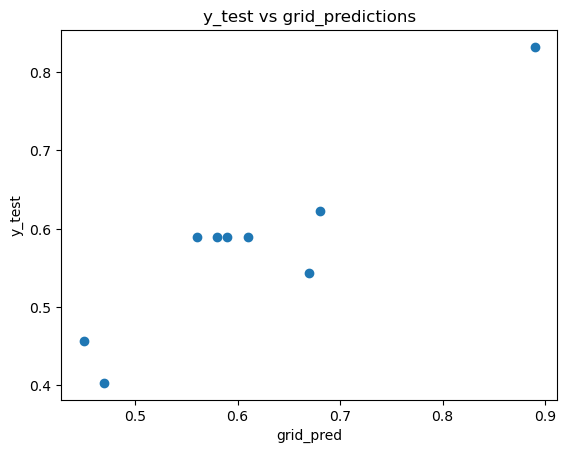

In [67]:
plt.scatter(y_test,grid_pred)
plt.xlabel('grid_pred')
plt.ylabel('y_test')
plt.title('y_test vs grid_predictions')

9